# fine-tuning baseline

In [1]:
from log_analysis import *

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())

sizes = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
splits = ['a', 'b', 'c']

res = []
for n in sizes:
    for x in splits:
        # print(f'{n}{x}')
        log = [[f'sweeps/fine-tune/{n}{x}.log', n, x]]
        _, maxs = df_from_log(['size', 'split'], ['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50', 'LAMR'], log, get_max=True)
        _res = {'size': n, 'split': x}
        for k, v in maxs[0].items():
            _res.update({k: v[1]})
        res.append(_res)

log = [['sweeps/fine-tune/all.log', 2357, 'a']]
_, maxs = df_from_log(['size', 'split'], ['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50', 'LAMR'], log, get_max=True)
# res.append({'size': 2357, 'split': 'a'}.update(maxs[0]))
_res = {'size': 2357, 'split': 'a'}
for k, v in maxs[0].items():
    _res.update({k: v[1]})
res.append(_res)

df_ft = pd.DataFrame(res)
df_ft = df_ft.melt(id_vars=['size', 'split'], var_name='metric')

In [2]:
from log_analysis import *

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())

sizes = [1, 2, 5, 10, 20, 50]
splits = ['a', 'b', 'c']

res = []
for n in sizes:
    for x in splits:
        # print(f'{n}{x}')
        log = [[f'sweeps/gpa_ppp/{n}{x}.log', n, x]]
        _, maxs = df_from_log(['size', 'split'], ['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50', 'LAMR'], log, get_max=True)
        _res = {'size': n, 'split': x}
        for k, v in maxs[0].items():
            _res.update({k: v[1]})
        res.append(_res)

# log = [['sweeps/fine-tune/all.log', 2357, 'a']]
# _, maxs = df_from_log(['size', 'split'], ['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50', 'LAMR'], log, get_max=True)
# res.append({'size': 2357, 'split': 'a'}.update(maxs[0]))
# _res = {'size': 2357, 'split': 'a'}
# for k, v in maxs[0].items():
#     _res.update({k: v[1]})
# res.append(_res)

df_gpa_ppp = pd.DataFrame(res)
df_gpa_ppp = df_gpa_ppp.melt(id_vars=['size', 'split'], var_name='metric')

In [3]:
from log_analysis import *

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())

sizes = [1, 2, 5, 10, 20, 50, 100]
splits = ['a', 'b', 'c']

res = []
for n in sizes:
    for x in splits:
        # print(f'{n}{x}')
        log = [[f'sweeps/gpa_p-p/{n}{x}.log', n, x]]
        _, maxs = df_from_log(['size', 'split'], ['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50', 'LAMR'], log, get_max=True)
        _res = {'size': n, 'split': x}
        for k, v in maxs[0].items():
            _res.update({k: v[1]})
        res.append(_res)

# log = [['sweeps/fine-tune/all.log', 2357, 'a']]
# _, maxs = df_from_log(['size', 'split'], ['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50', 'LAMR'], log, get_max=True)
# res.append({'size': 2357, 'split': 'a'}.update(maxs[0]))
# _res = {'size': 2357, 'split': 'a'}
# for k, v in maxs[0].items():
#     _res.update({k: v[1]})
# res.append(_res)

df_gpa_p_p = pd.DataFrame(res)
df_gpa_p_p = df_gpa_p_p.melt(id_vars=['size', 'split'], var_name='metric')

In [7]:
from log_analysis import *

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())

sizes = [2, 5, 10, 20, 50, 100]
splits = ['a', 'b', 'c']

res = []
for n in sizes:
    for x in splits:
        # print(f'{n}{x}')
        log = [[f'sweeps/gpa_pxg/{n}{x}.log', n, x]]
        _, maxs = df_from_log(['size', 'split'], ['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50', 'LAMR'], log, get_max=True)
        _res = {'size': n, 'split': x}
        for k, v in maxs[0].items():
            _res.update({k: v[1]})
        res.append(_res)

# log = [['sweeps/gpa_pxg/all.log', 2357, 'a']]
# _, maxs = df_from_log(['size', 'split'], ['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50', 'LAMR'], log, get_max=True)
# res.append({'size': 2357, 'split': 'a'}.update(maxs[0]))
# _res = {'size': 2357, 'split': 'a'}
# for k, v in maxs[0].items():
#     _res.update({k: v[1]})
# res.append(_res)

df_gpa_pxg = pd.DataFrame(res)
df_gpa_pxg = df_gpa_pxg.melt(id_vars=['size', 'split'], var_name='metric')

In [8]:
from log_analysis import *

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(kit())

sizes = [2, 5, 10, 20, 50, 100]
splits = ['a', 'b', 'c']

res = []
for n in sizes:
    for x in splits:
        # print(f'{n}{x}')
        log = [[f'sweeps/gpa_-xg/{n}{x}.log', n, x]]
        _, maxs = df_from_log(['size', 'split'], ['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50', 'LAMR'], log, get_max=True)
        _res = {'size': n, 'split': x}
        for k, v in maxs[0].items():
            _res.update({k: v[1]})
        res.append(_res)

# log = [['sweeps/gpa_-xg/all.log', 2357, 'a']]
# _, maxs = df_from_log(['size', 'split'], ['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50', 'LAMR'], log, get_max=True)
# res.append({'size': 2357, 'split': 'a'}.update(maxs[0]))
# _res = {'size': 2357, 'split': 'a'}
# for k, v in maxs[0].items():
#     _res.update({k: v[1]})
# res.append(_res)

df_gpa__xg = pd.DataFrame(res)
df_gpa__xg = df_gpa__xg.melt(id_vars=['size', 'split'], var_name='metric')

In [9]:
df = pd.concat([df_ft, df_gpa_ppp, df_gpa_p_p, df_gpa_pxg, df_gpa__xg], keys=['fine-tune', 'GPA all', 'GPA RoI+cls', 'GPA-GT all', 'GPA-GT cls+bbox']).rename_axis(['setting', None]).reset_index(level=0)
df.head()

,setting,size,split,metric,value
0,fine-tune,1,a,bbox_mAP,0.487
1,fine-tune,1,b,bbox_mAP,0.447
2,fine-tune,1,c,bbox_mAP,0.465
3,fine-tune,2,a,bbox_mAP,0.524
4,fine-tune,2,b,bbox_mAP,0.506


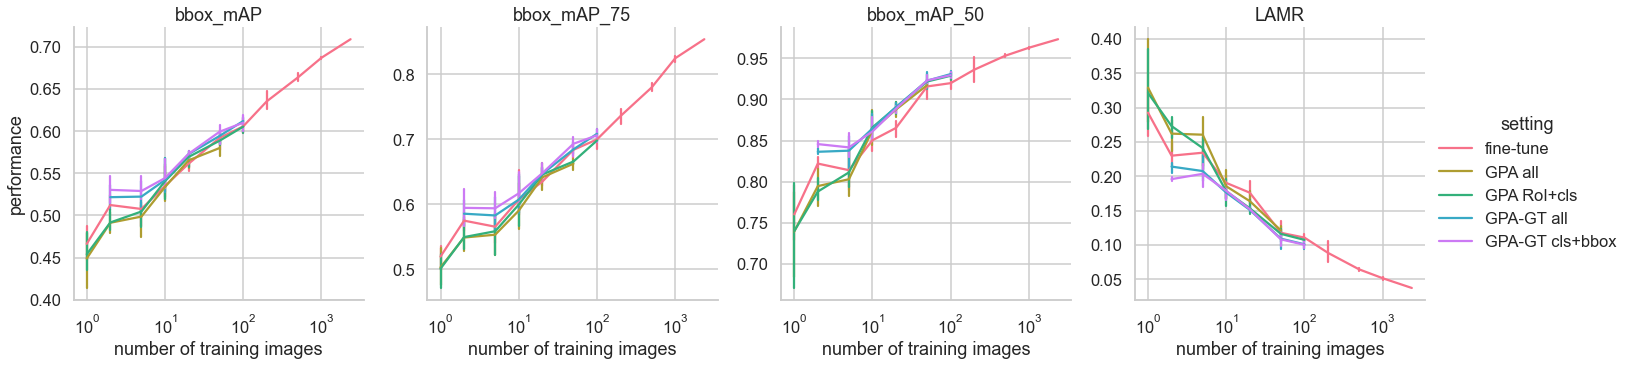

In [13]:
g = sb.relplot(data=df,
               x='size',
               y='value',
               col='metric',
               hue='setting',
               kind='line',
               err_style='bars',
               facet_kws={
                   'sharey': False,
                   'sharex': True
               })
g.set_xlabels('number of training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
plt.xscale('log')

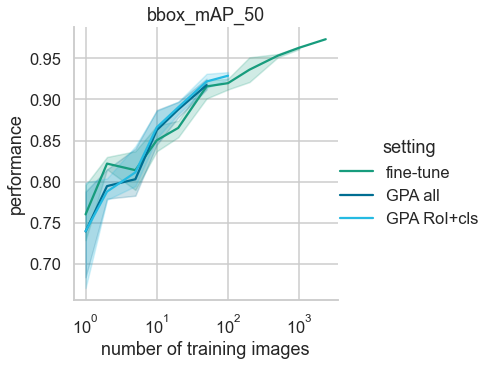

In [23]:
g = sb.relplot(data=df[df['metric'] == 'bbox_mAP_50'], x='size', y='value', col='metric', hue='setting', kind='line')
g.set_xlabels('number of training images')
g.set_ylabels('performance')
g.set_titles(col_template="{col_name}")
plt.xscale('log')